In [20]:
import msprime, pyslim, tskit
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [21]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/tests2/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]

In [22]:
coalescencAt1 = 0
coalescencAt2 = 0
coalescencAt3 = 0
coalescencAt4 = 0
coalescencAt5 = 0
coalescencAt6 = 0
coalescencAt7 = 0
coalescencAt8 = 0
coalescencAt9 = 0
coalescencAt10 = 0
for x in inputFiles:
    ts = tskit.load(path_to_trees + '/' + x)
    samples = list(ts.samples())[0:2]
    tss = ts.simplify(samples=samples)
    heights = np.zeros(tss.num_trees+1)
    generationOfHomo = []
    for tree in tss.trees():
        if tree.num_roots>1:
             heights[tree.index] = 10
#         heights[tree.index] = 2
        else:
            children = tree.children(tree.root)
            real_root = tree.root if len(children) > 1 else children[0]
            heights[tree.index] = tree.time(real_root)
#        heights[tree.index] = 1
    heights[-1] = heights[-2]
    breakpoints = list(tss.breakpoints())
    breakpoints = pd.DataFrame(breakpoints)
    heights = pd.DataFrame(heights)
    df = pd.concat([breakpoints, heights], axis=1)
    df.columns = ['breakpoints', 'heights']
    for row in df:
        df['length'] = np.where((df['heights'] < 20), df['breakpoints'].shift(-1) - df['breakpoints'], np.nan)
    df = df.dropna()
    coalescencAt1 = coalescencAt1 + sum(df[df['heights'] == 1]['length'])
    coalescencAt2 = coalescencAt2 + sum(df[df['heights'] == 2]['length'])
    coalescencAt3 = coalescencAt3 + sum(df[df['heights'] == 3]['length'])
    coalescencAt4 = coalescencAt4 + sum(df[df['heights'] == 4]['length'])
    coalescencAt5 = coalescencAt5 + sum(df[df['heights'] == 5]['length'])
    coalescencAt6 = coalescencAt6 + sum(df[df['heights'] == 6]['length'])
    coalescencAt7 = coalescencAt7 + sum(df[df['heights'] == 7]['length'])
    coalescencAt8 = coalescencAt8 + sum(df[df['heights'] == 8]['length'])
    coalescencAt9 = coalescencAt9 + sum(df[df['heights'] == 9]['length']) 
    coalescencAt10 = coalescencAt10 + sum(df[df['heights'] == 10]['length'])
    
    


In [23]:
coalescencAt9


143804862863.0

In [24]:

#Next row is long, but basically finds the heterozygosity at different generatrions
heterozygosity = [(coalescencAt1 + coalescencAt2 + coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9+coalescencAt10), (coalescencAt2 + coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt8 + coalescencAt9 + coalescencAt10),(coalescencAt9 + coalescencAt10),(coalescencAt10)]
initialHeterozygosity = coalescencAt1 + coalescencAt2 + coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9 + coalescencAt10

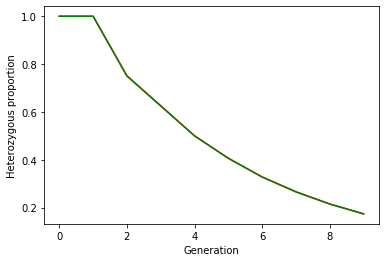

In [27]:
normalisedHeterozygosity = []
for x in heterozygosity:
    normalisedHeterozygosity.append(x/initialHeterozygosity)
plt.plot(normalisedHeterozygosity,'r', label = 'SLiM 1')
x = [1, 1-0, 1-0.25, 1-0.375, 1-0.5, 1-0.59375, 1-0.671875, 1-0.734375, 1-0.785156, 1-0.826172]
generations = [0,1,2,3,4,5,6,7,8,9]
plt.plot(generations, x,'g', label='Prediction')
plt.xlabel("Generation")

plt.ylabel("Heterozygous proportion")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/DiversityThresholds/SLiM_%_expected_loss_of_heterozygosity.png')

In [29]:
normalisedHeterozygosity

[1.0,
 1.0,
 0.7511434575067584,
 0.6258199783542864,
 0.5000813623908182,
 0.4062708360914047,
 0.3279132980639058,
 0.266370336261419,
 0.21530786113748968,
 0.17422075863626404]

In [31]:
print(coalescencAt10/initialHeterozygosity)

0.17422075863626404


In [24]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/tests2/Simulations_2'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]

In [25]:
coalescencAt1 = 0
coalescencAt2 = 0
coalescencAt3 = 0
coalescencAt4 = 0
coalescencAt5 = 0
coalescencAt6 = 0
coalescencAt7 = 0
coalescencAt8 = 0
coalescencAt9 = 0
for x in inputFiles:
    ts = tskit.load(path_to_trees + '/' + x)
    samples = list(ts.samples())[0:2]
    tss = ts.simplify(samples=samples)
    heights = np.zeros(tss.num_trees+1)
    generationOfHomo = []
    for tree in tss.trees():
        if tree.num_roots>1:
             heights[tree.index] = 9
#         heights[tree.index] = 2
        else:
            children = tree.children(tree.root)
            real_root = tree.root if len(children) > 1 else children[0]
            heights[tree.index] = tree.time(real_root)
#        heights[tree.index] = 1
    heights[-1] = heights[-2]
    breakpoints = list(tss.breakpoints())
    breakpoints = pd.DataFrame(breakpoints)
    heights = pd.DataFrame(heights)
    df = pd.concat([breakpoints, heights], axis=1)
    df.columns = ['breakpoints', 'heights']
    for row in df:
        df['length'] = np.where((df['heights'] < 20), df['breakpoints'].shift(-1) - df['breakpoints'], np.nan)
    df = df.dropna()
    coalescencAt1 = coalescencAt1 + sum(df[df['heights'] == 1]['length'])
    coalescencAt2 = coalescencAt2 + sum(df[df['heights'] == 2]['length'])
    coalescencAt3 = coalescencAt3 + sum(df[df['heights'] == 3]['length'])
    coalescencAt4 = coalescencAt4 + sum(df[df['heights'] == 4]['length'])
    coalescencAt5 = coalescencAt5 + sum(df[df['heights'] == 5]['length'])
    coalescencAt6 = coalescencAt6 + sum(df[df['heights'] == 6]['length'])
    coalescencAt7 = coalescencAt7 + sum(df[df['heights'] == 7]['length'])
    coalescencAt8 = coalescencAt8 + sum(df[df['heights'] == 8]['length'])
    coalescencAt9 = coalescencAt9 + sum(df[df['heights'] == 9]['length'])     
    

In [26]:
#Next row is long, but basically finds the heterozygosity at different generatrions
heterozygosity2 = [(coalescencAt1 + coalescencAt2 + coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9), (coalescencAt2 + coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9),(coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9),(coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9),(coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9),(coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9),(coalescencAt7 + coalescencAt8 + coalescencAt9),(coalescencAt8 + coalescencAt9),(coalescencAt9)]
initialHeterozygosity2 = coalescencAt1 + coalescencAt2 + coalescencAt3 + coalescencAt4 + coalescencAt5 + coalescencAt6 + coalescencAt7 + coalescencAt8 + coalescencAt9

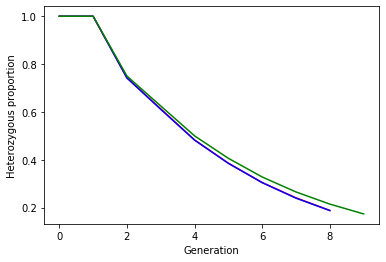

In [27]:
normalisedHeterozygosity = []
for x in heterozygosity:
    normalisedHeterozygosity.append(x/initialHeterozygosity)
plt.plot(normalisedHeterozygosity,'r', label = 'SLiM 1')

normalisedHeterozygosity2 = []
for x in heterozygosity2:
    normalisedHeterozygosity2.append(x/initialHeterozygosity2)
plt.plot(normalisedHeterozygosity2,'b', label='SLiM 2')
x = [1, 1-0, 1-0.25, 1-0.375, 1-0.5, 1-0.59375, 1-0.671875, 1-0.734375, 1-0.785156, 1-0.826172]
generations = [0,1,2,3,4,5,6,7,8,9]
plt.plot(generations, x,'g', label='Prediction')
plt.xlabel("Generation")

plt.ylabel("Heterozygous proportion")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/DiversityThresholds/expected_loss_of_heterozygosity.png')